# PYTHON-MYSQL--PROJECT  ECOMMERCE



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mysql.connector as mysql
import pymysql as pm
import os



In [3]:
# List of CSV files and their corresponding table names
csv_files = [
 ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_item')  # Added payments.csv for specific handling
]

In [7]:
import pandas as pd
import mysql.connector
import pymysql as pm
import os

# List of CSV files and their corresponding table names
csv_files = [
 ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_item')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = pm.connect(
   host='localhost',
    user='root',
    password='parveen1182002',
    database='python_sql_project'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:/OneDrive/Desktop/Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [3]:
# Connect to the MySQL database
conn = pm.connect(
   host='localhost',
    user='root',
    password='parveen1182002',
    database='python_sql_project'
)
cursor = conn.cursor()

# QUESTION-1:=>SELECT ALL UNIQUE CITIES WHERE CUSTOMER ARE LOCATED ?

In [4]:
query='''select distinct customer_city from  customers;'''
cursor.execute(query)
data=cursor.fetchall()
data
df=pd.DataFrame(data)
df.head(10)

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
5,jaragua do sul
6,timoteo
7,curitiba
8,belo horizonte
9,montes claros


# QUESTION-2:=>COUNT THE NUMBER OF ORDER PLACED IN 2017 ?

In [13]:
query='''select count(order_id) from orders where order_purchase_timestamp=2017 '''
cursor.execute(query)
data=cursor.fetchall()
data[0][0]

# ------or---------------------

'total order placed in year of 2017 is: ',data[0][0]

('total order placed in year of 2017 is: ', 45101)

# QUESTION-3:=>FIND THE TOTAL SALES OER CATEGORY ?

In [18]:
query='''select upper(products.product_category) as category,round(sum(payments.payment_value),2) as sales
from products join order_item
on products.product_id=order_item.product_id
join payments
on payments.order_id=order_item.order_id
group by products.product_category '''
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['CATEGORY','SALES'])
df

,CATEGORY,SALES
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# QUESTION-4:=>CALCULATE THE PERCENTAGE OFORDER THAT WERE PAID IN INSATALLMENTS ?

In [30]:
query=''' select round((sum(case when payment_installments >1 then 1 else 0 end)/count(*))*100,2) as percentage_of_installments 
from payments; '''
cursor.execute(query)
data=cursor.fetchall()
'the percentage of order that were paid in installments is: ',data[0]

('the percentage of order that were paid in installments is: ',
 (Decimal('49.42'),))

# QUESTION-5:=>COUNT THE NUMBER OF CUSTOMER FROM EACH STATE ?

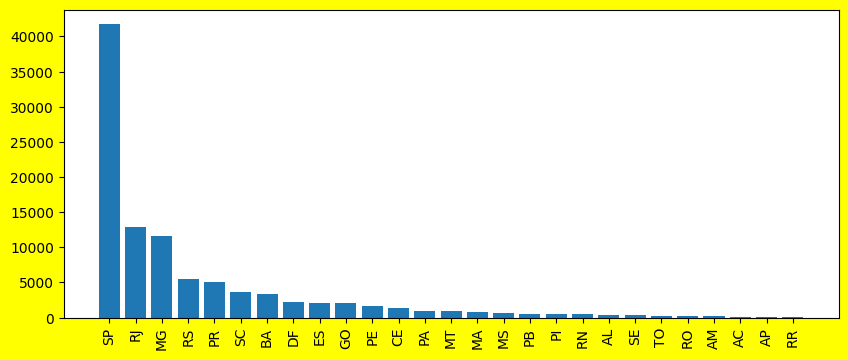

In [84]:
query=''' SELECT customer_state,count(customer_id) as counts from customers group by customer_state order by counts;'''
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['state','count_customer'])
df=df.sort_values(by ='count_customer', ascending=False)
plt.figure(figsize=(10,4),facecolor='yellow')
plt.xticks(rotation=90)
plt.bar(df['state'],df['count_customer'])
plt.show()


# INTERMEDIATE QUERY --------------------------------

# QUESTION-6:=>CALCULATE THE NUMBER OF ORDERS PER MONTHS IN 2018 ?


C:\Users\DELL\AppData\Local\Temp\ipykernel_16188\652991098.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=df,x='months',y='order_count',order=orders,color='red',palette='Blues',)


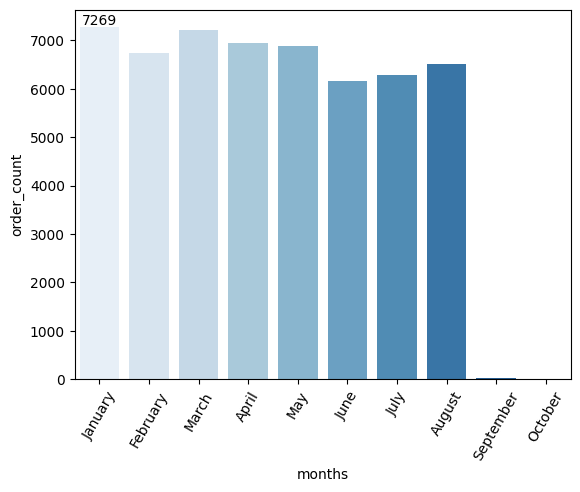

In [23]:
query=""" select year(order_purchase_timestamp) as years,monthname(order_purchase_timestamp) as months,count(order_id)
from orders where year(order_purchase_timestamp)=2018 group by years, months; """
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['year','months','order_count'])
orders=['January','February','March','April','May','June','July','August','September','October']
# plt.bar(df['months'],df['order_count'])
ax=sns.barplot(data=df,x='months',y='order_count',order=orders,color='red',palette='Blues',)
ax.bar_label(ax.containers[0],)
plt.xticks(rotation=60)
plt.show()

# QUESTION-7:=>FIND THE AVERAGE NUMBER OF PRODUCT PER ORDER,GROUPED BY CUSTOMER CITY ?

In [8]:
query=""" with  count_per_order as(select orders.customer_id as cus_id,orders.order_id as order_id,
count( order_item.order_id) as count_of_order
from
orders join order_item
on
orders.order_id=order_item.order_id
group by orders.customer_id,orders.order_id)

select customers.customer_city,round(avg(count_per_order.count_of_order),2) as average
from
customers join count_per_order
on
customers.customer_id=count_per_order.cus_id
group by customers.customer_city 
order by average desc; """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['cusomer_city','avg_NOP_per_order'])
df.head(10)

,cusomer_city,avg_NOP_per_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# QUESTION-8:=>CALCULATE THE PERCENTAGE OF TOTAL NUMBER OF REVENUE CONTRIBUTED BY EACH PRODUCT CATEGORY ?

<function matplotlib.pyplot.show(close=None, block=None)>

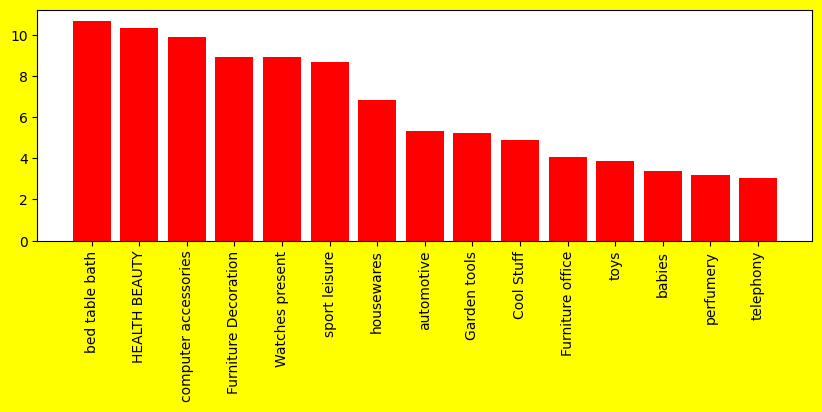

In [31]:
query=""" select products.product_category,
round(((sum(payments.payment_value)/(select sum(payment_value) from payments))*100),2) as percentage_of_revenue
 from payments join order_item
on payments.order_id=order_item.order_id
join products
on products.product_id=order_item.product_id
 group by products.product_category
order by percentage_of_revenue  desc; """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['category','%_of_revenue'])
df=df.head(15)
df
plt.figure(figsize=(10,3),facecolor='yellow')
plt.bar(df['category'],df['%_of_revenue'],color='red')
plt.xticks(rotation=90)
plt.show

# QUESTION-9:=> IDENTIFY THE CORRELATION B/W PRODUCT PRICE AND NUMBER OF TIMES A PRODUCT HAS BEEN PURCHASED ?

In [46]:
query=""" select products.product_category,count(order_item.product_id),round((avg(order_item.price)),2)
from order_item join products
on order_item.product_id=products.product_id
group by products.product_category
order by round((avg(order_item.price)),2)
; """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['CATEGORY','NO.OF.PRODUCT','AVG.PRICE'])
df
arr1=df['NO.OF.PRODUCT']
arr2=df['AVG.PRICE']

np.corrcoef(arr1,arr2)


array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

#  QUESTION-10:=>CALCULATE THE TOTAL REVENUE GENERATED BY EACH SELLER AND RANK THEM BY REVENUE ?

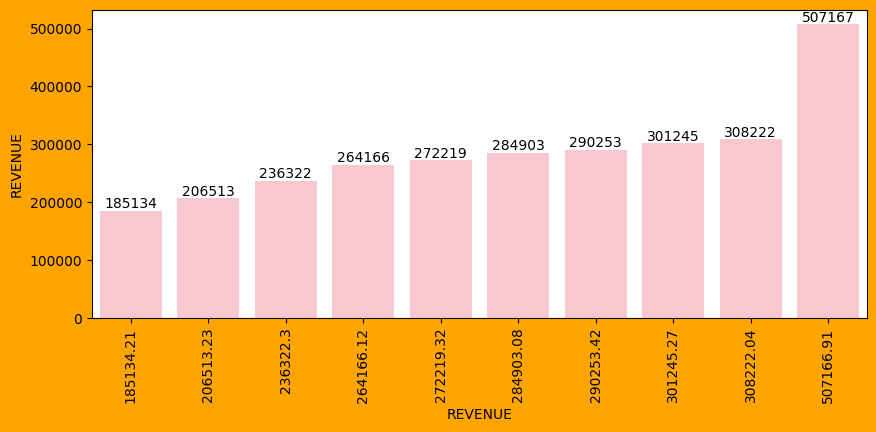

In [30]:
query="""  (select order_item.seller_id,round((sum(payments.payment_value)),2) as revenue,
dense_rank() over(ORDER BY round((sum(payments.payment_value)),2) desc)
from order_item join payments
on order_item.order_id=payments.order_id
group by order_item.seller_id) """
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['SELLERS','REVENUE','RANK'])
df=df.head(10)
plt.figure(figsize=(10,4),facecolor='orange')
ax=sns.barplot(data=df,x='REVENUE',y='REVENUE',color='pink')
ax.bar_label(ax.containers[0],)
plt.xticks(rotation=90)
plt.show()

# --------ADVANCED QUERY-------

# QUESTION-11:=>CALCULATE THE MOVING AVERAGE OF ORDER VALUES FOR EACH CUSTOMER OVER THEIR ORDER HISTORY ?

In [34]:
query=""" with a1 as
(SELECT orders.customer_id as cus_id,orders.order_purchase_timestamp as time_stamp,
payments.payment_value as payment
from orders join payments
on orders.order_id=payments.order_id)

select  cus_id,time_stamp,payment,
round(avg(payment) over (partition by cus_id order by time_stamp rows between 2 preceding and current row),2)
as moving_avg
from a1 order by 
round(avg(payment)
 over (partition by cus_id order by time_stamp rows between 2 preceding and current row),2) desc;



"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['customer_id','timestamp','payment','moving_avg_payments'])
df.head(10)

,customer_id,timestamp,payment,moving_avg_payments
0,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,13664.10,13664.08
1,ec5b2ba62e574342386871631fafd3fc,2018-07-15 14:49:44,7274.88,7274.88
2,c6e2731c5b391845f6800c97401a43a9,2017-02-12 20:37:36,6929.31,6929.31
3,f48d464a0baaea338cb25f816991ab1f,2018-07-25 18:10:17,6922.21,6922.21
4,3fd6777bbce08a352fddd04e4a7cc8f6,2017-05-24 18:14:34,6726.66,6726.66
5,05455dfa7cd02f13d132aa7a6a9729c6,2017-11-24 11:03:35,6081.54,6081.54
6,df55c14d1476a9a3467f131269c2477f,2017-04-01 15:58:40,4950.34,4950.34
7,e0a2412720e9ea4f26c1ac985f6a7358,2018-07-12 12:08:36,4809.44,4809.44
8,24bbf5fd2f2e1b359ee7de94defc4a15,2017-04-18 18:50:13,4764.34,4764.34
9,3d979689f636322c62418b6346b1c6d2,2018-06-22 12:23:19,4681.78,4681.78


# QUESTION-12:=>CALCULATE THE COMMULATIVE SALES PER MONTH FOR EACH YEAR ?

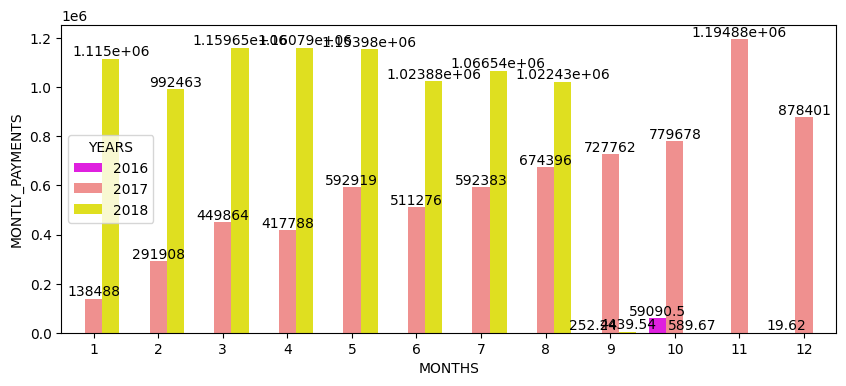

In [49]:
query=""" with temp as (select year(orders.order_purchase_timestamp) as years,month(orders.order_purchase_timestamp) 
as months,
round(sum(payments.payment_value),2) as payment from
orders join payments
on orders.order_id=payments.order_id
group by year(orders.order_purchase_timestamp),month(orders.order_purchase_timestamp)
order by year(orders.order_purchase_timestamp),month(orders.order_purchase_timestamp))

select *,sum(payment) over(order by years,months)
from temp
"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['YEARS','MONTHS','MONTLY_PAYMENTS','COMMULATIVE_PAYMENTS'])
df
plt.figure(figsize=[10,4])

ax=sns.barplot(data=df,x='MONTHS',y='MONTLY_PAYMENTS',hue='YEARS',palette='spring')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])


plt.show()

# QUESTION-13:=>CALCULATE THE YEAR OVER YEAR GROTH OF TOTAL SALES ?

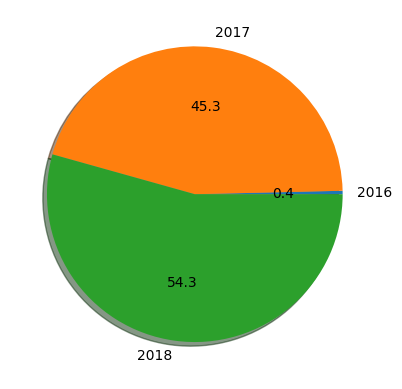

In [66]:
query="""   with temp as
 (select YEAR(orders.order_purchase_timestamp) as years,round(sum(payments.payment_value),2)
 as total_sales
 from orders join payments
 on orders.order_id=payments.order_id
 group by YEAR(orders.order_purchase_timestamp)
 order by YEAR(orders.order_purchase_timestamp))
 
 select years,total_sales, ((total_sales-lag(total_sales,1) over(order by years))
 /lag(total_sales,1) over(order by years))*100
 from temp
order by years;
"""
cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['YEARS','TOTAL_SALES','YOY'])
df
plt.pie(df['TOTAL_SALES'],labels=df['YEARS'],autopct='%.1f',shadow=True)
plt.show()

# QUESTION-14:=>CALCULATE THE RETENTION RATE OF CUSTOMER,DEFINED AS THE PERCENTAGE OF CUSTOMERS WHO MAKE ANOTHER PURCHASE WITHIN 6 MONTHS OF THEIR FIRST PURCHASE ?


In [8]:
query=""" with a as (select customer_id,min(order_purchase_timestamp) as first_date from orders
group by customer_id),

 b as (select a.customer_id,count(orders.order_purchase_timestamp) as returning_user from
a join orders
on a.customer_id=orders.customer_id
and orders.order_purchase_timestamp > first_date
and orders.order_purchase_timestamp <=date_add(first_date,interval 6 month)
group by a.customer_id)

select (count(distinct b.customer_id)/count(distinct a.customer_id))*100 from a left join b
on a.customer_id=b.customer_id;
"""
cursor.execute(query)
data=cursor.fetchall()
data[0][0]

# their is no such customer who place order again in 6 months that why its show retention rate=0%.


Decimal('0.0000')

# QUESTION-15:=>IDENTIFY THE TOP 3 CUSTOMER WHO SPENT THE MOST MONEY IN EACH YEAR ?

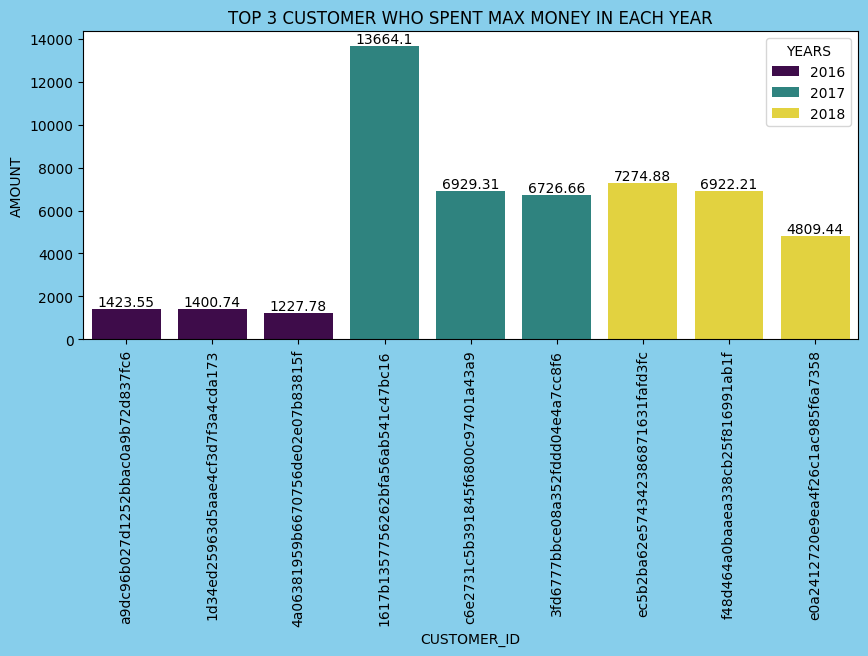

In [41]:
query=""" with a as (SELECT orders.customer_id,year(orders.order_purchase_timestamp) as years,sum(payments.payment_value)
 as sum_total
from orders join payments
on orders.order_id=payments.order_id
group by orders.customer_id,year(orders.order_purchase_timestamp)
order by years,sum_total ),

 b as(select *,dense_rank() over(partition by years order by sum_total desc) as ranks from a)
 
 select * from b where ranks<=3; """

cursor.execute(query)
data=cursor.fetchall()
df=pd.DataFrame(data,columns=['CUSTOMER_ID','YEARS','AMOUNT','RANK'])
df
plt.figure(figsize=[10,4],facecolor='skyblue')
ax=sns.barplot(x='CUSTOMER_ID',y='AMOUNT',data=df,hue='YEARS',palette='viridis')
plt.title('TOP 3 CUSTOMER WHO SPENT MAX MONEY IN EACH YEAR')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])

plt.xticks(rotation=90)
plt.show()